In [1]:
%matplotlib inline

In [2]:
import itertools 
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects

import numpy as np
import pandas as pd

# (scale, length, randomness).)
#plt.xkcd()
import highlight_text as ht

import intro_plots as ip
from papercolors import colordict as pcd

paper_path = Path('../figures/')


In [3]:
# tau 
df = pd.read_csv("plot_data")

In [4]:
df['AC'] = df['NAME'].replace(ip.airport_codes)

In [5]:
df

,NAME,TEMP (°F),PRCP (in.),NEW YORK LAGUARDIA AP,ALBANY AP,NEW YORK JFK INTL AP,ISLIP LI MACARTHUR AP,ROCHESTER GTR INTL AP,AC
0,NEW YORK LAGUARDIA AP,34.0,0.6614,0.000000,1.964987,0.183772,0.778735,4.458209,LGA
1,ALBANY AP,-27.0,0.2598,1.964987,0.000000,2.105025,2.073629,3.885503,ALB
2,NEW YORK JFK INTL AP,22.0,0.6299,0.183772,2.105025,0.000000,0.678512,4.632957,JFK
3,ISLIP LI MACARTHUR AP,21.0,0.5984,0.778735,2.073629,0.678512,0.000000,5.130889,ISP
4,ROCHESTER GTR INTL AP,-2.0,0.2205,4.458209,3.885503,4.632957,5.130889,0.000000,ROC


In [6]:
df['TC'] = df['TEMP (°F)'].astype(str) + ' °F'
df['PC'] = df['PRCP (in.)'].astype(str) + ' in.'
df['color'] = df['NAME'].replace(ip.cdict)

In [7]:
df

,NAME,TEMP (°F),PRCP (in.),NEW YORK LAGUARDIA AP,ALBANY AP,NEW YORK JFK INTL AP,ISLIP LI MACARTHUR AP,ROCHESTER GTR INTL AP,AC,TC,PC,color
0,NEW YORK LAGUARDIA AP,34.0,0.6614,0.000000,1.964987,0.183772,0.778735,4.458209,LGA,34.0 °F,0.6614 in.,#f58231
1,ALBANY AP,-27.0,0.2598,1.964987,0.000000,2.105025,2.073629,3.885503,ALB,-27.0 °F,0.2598 in.,#469990
2,NEW YORK JFK INTL AP,22.0,0.6299,0.183772,2.105025,0.000000,0.678512,4.632957,JFK,22.0 °F,0.6299 in.,#000075
3,ISLIP LI MACARTHUR AP,21.0,0.5984,0.778735,2.073629,0.678512,0.000000,5.130889,ISP,21.0 °F,0.5984 in.,#ffe119
4,ROCHESTER GTR INTL AP,-2.0,0.2205,4.458209,3.885503,4.632957,5.130889,0.000000,ROC,-2.0 °F,0.2205 in.,#800000


In [8]:
drows = df[['AC', 'TC', 'PC']].loc[[0,2]]
vrows = df[['color','TEMP (°F)', 'PRCP (in.)']].loc[[0,2]]

In [10]:
for i, r in drows.iterrows():
    print(i, r.values.astype(str).T)

0 ['LGA' '34.0 °F' '0.6614 in.']
2 ['JFK' '22.0 °F' '0.6299 in.']


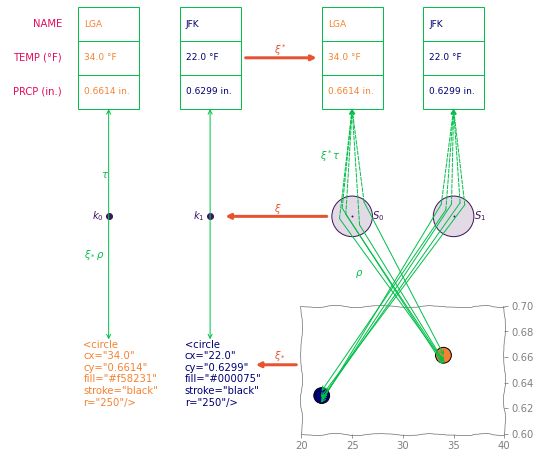

In [174]:
fig, axd = plt.subplot_mosaic([['tau', 'tau_pull'], ['k', 's'], ['rho_push', 'rho']], figsize=(8,8))
x = [-0, 1]
y = [.5]*len(x)
# K
axd['k'].scatter(x,y, color=pcd['base'])
axd['k'].axis('off')
axd['k'].set(aspect='equal', ylim=(0, 1), xlim=(-.5, 1.5))

for i, xi in enumerate(x):
    axd['k'].text(xi-.05, y[0], f"$k_{i}$", color=pcd['base'], ha='right', va='center')
    axd['s'].text(xi+.2, y[0], f"$S_{i}$", color=pcd['base'], ha='left', va='center')
#S
radius = .2
axd['s'].scatter(x,y, color=pcd['base'], s=1)
[axd['s'].add_patch(mpatches.Circle((xi,yi), radius=radius, edgecolor=pcd['base'], 
                                    facecolor=mcolors.to_rgba(pcd['base'], alpha=.15)))
                     for xi, yi in zip(x, y)]
axd['s'].axis('off')
axd['s'].set(aspect='equal', ylim=(0, 1), xlim=(-.5, 1.5))

width = .6
height = 1

values = [('tau', [['NAME'],['TEMP (°F)'], ['PRCP (in.)']]), 
          ('rho_push', [['COLOR'],['X'], ['Y']])]

bbox = [-1, 0, width, height]
for axn, data in [values[0]]:
    tab = axd[axn].table(data, transform=axd[axn].transData, bbox=bbox)
    for i in range(3): 
        tab[i,0].set_edgecolor('white')
        tab[i,0].get_text().set_color(pcd['fiber'])

for axn in ['tau', 'tau_pull']:
    for i, (ind, r) in enumerate(drows.iterrows()):
        # double nest for columns
        width = .6
        bbox = [x[i]- width/2, 0 , width , 1] 
        tab = axd[axn].table([[rv] for rv in r.values.astype(str).T], 
                       bbox=bbox, transform=axd[axn].transData, cellLoc='left')
        for ri in range(len(r)):
            tab[ri,0].set_edgecolor(pcd['section'])
            tab[ri,0].get_text().set_color(ip.cdict[ip.rac[r['AC']]])


s=250
axd['rho'].scatter('TEMP (°F)', 'PRCP (in.)', data=vrows, color=vrows['color'], s=s, edgecolor='k')
axd['rho'].set(xlim=(20, 40), ylim=(.6, .7))
axd['rho'].tick_params(right=True, left=False, labelleft=False, labelright=True)

rpy = .75
for i, (ind, r) in enumerate(vrows.iterrows()):
    # double nest for columns
    spec = f'<circle\ncx="{r["TEMP (°F)"]}"\ncy="{r["PRCP (in.)"]}"\nfill="{r["color"]}"\nstroke="black"\nr="{s}"/>' 
    axd['rho_push'].text(x[i]-.25, rpy, spec, color=r['color'], va='top')
    
for axn in ['tau', 'tau_pull', 'rho_push']:
    axd[axn].set(xlim=(-.5, 1.5), ylim=(-.1,1), aspect='equal')
    axd[axn].axis('off')





for i, (inf, row) in enumerate(vrows.iterrows()):
    xi = x[i]
    at = mpatches.ConnectionPatch((xi,.5), (xi, -.005), 
                                  coordsA=axd['k'].transData, coordsB=axd['tau'].transData,
                                  color=pcd['section'], arrowstyle="->",)
    arp = mpatches.ConnectionPatch((xi,.5), (xi, rpy), 
                                  coordsA=axd['k'].transData, coordsB=axd['rho_push'].transData,
                                  color=pcd['section'], arrowstyle="->",)
    fig.add_artist(at)
    fig.add_artist(arp)
    
    xmargin = .1
    ymargin = .01
    xm = row['TEMP (°F)']
    ym = row['PRCP (in.)']
    xt = np.random.uniform(low = xm-xmargin, high = xm+xmargin, size=10)
    yt = np.random.uniform(low = ym-ymargin, high = ym+ymargin, size=10)
    for j, (xs,ys) in enumerate(zip(np.random.uniform(low=xi-radius+.05, high=xi+radius-.05, size=5),
                       np.random.uniform(low=.5-radius+.05, high=.5+radius-.05, size=5))):
        atp = mpatches.ConnectionPatch((xs,ys), (xi, -.005), 
                                  coordsA=axd['s'].transData, coordsB=axd['tau_pull'].transData,
                                  color=pcd['section'], arrowstyle="->",linestyle='--')
       
        ar = mpatches.ConnectionPatch((xs,ys), (xt[j], yt[j]), 
                                  coordsA=axd['s'].transData, coordsB=axd['rho'].transData,
                                  color=pcd['section'], arrowstyle="->",)
        fig.add_artist(atp)
        fig.add_artist(ar)  

fig.text(.2, .57, r'$\tau$', color=pcd['section'])
fig.text(.17, .43, r'$\xi_*\rho$', color=pcd['section'])
fig.text(.58, .6, r'$\xi^*\tau$', color=pcd['section'])
fig.text(.64, .4, r'$\rho$', color=pcd['section'])
        
fig.text(.5, .255, r"$\xi_*$", color=pcd['functor'])
push = mpatches.ConnectionPatch((1.85,.5), (1.45, .5), 
                                  coordsA=axd['rho_push'].transData, coordsB=axd['rho_push'].transData,
                                  color=pcd['functor'], arrowstyle="->", lw=3)
fig.add_artist(push)

fig.text(.5, .785, r"$\xi^*$", color=pcd['functor'])
pull = mpatches.ConnectionPatch((1.35, .5), (-.35, .5), 
                                  coordsA=axd['tau'].transData, coordsB=axd['tau_pull'].transData,
                                  color=pcd['functor'], arrowstyle="->", lw=3)
fig.add_artist(pull)
fig.text(.5, .5025, r"$\xi$", color=pcd['functor'], va='bottom')
vind = mpatches.ConnectionPatch((-.25,.5), (1.15, .5), 
                                  coordsA=axd['s'].transData, coordsB=axd['k'].transData,
                                  color=pcd['functor'], arrowstyle="->", lw=3)
fig.add_artist(vind)
    

axd['rho'].spines[:].set_sketch_params(1, 100, 10)
axd['rho'].spines[:].set_color('gray')
axd['rho'].tick_params(colors='gray')
fig.savefig('../figures/xi_scatter.png', dpi=200, bbox_inches='tight')

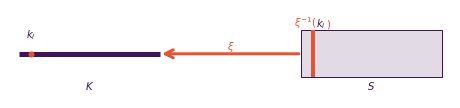

In [172]:
fig, ax = plt.subplots(figsize=(8,4))
rx, ry = (0,0)
w, h = (3, 1)
rect = mpatches.Rectangle((rx, ry), w, h, edgecolor=pcd['base'], facecolor=mcolors.to_rgba(pcd['base'], alpha=.15))
ax.add_artist(rect)
lxm = rx-(2*w)
lxy = rx-w
ax.hlines(ry+h/2,lxm, lxy , lw=5, color=pcd['base'])
ax.set(aspect='equal', xlim=(-6.25, 3.25), ylim=(-.5,1.5))
ypad=.05
ax.text(lxm+w/2, ry-ypad, r'$K$', ha='center', va='top', color=pcd['base'])
ax.text(rx+w/2, ry-ypad, r'$S$', ha='center', va='top', color=pcd['base'])
arr = mpatches.FancyArrowPatch((rx, ry+h/2), (lxy, ry+h/2), color=pcd['functor'], 
                               arrowstyle="->", lw=3, mutation_scale=20)
ax.add_artist(arr)
ax.text(lxy+w/2, ry+h/2, r'$\xi$', color=pcd['functor'], va='bottom', ha='center')

k = .25
ax.scatter(lxm+k, ry+h/2, s=25, color=pcd['functor'], zorder=2)
ax.vlines(ry+k, ry, ry+h, color=pcd['functor'], lw=4)
ax.text(lxm+k, ry+h*(3/4), r'$k_i$', color=pcd['base'], va='bottom', ha='center')
ht.ax_text(rx+k, ry+h, r'<$\xi^{-1}($>'+'<$k_i$>'+'<$)$>', va='bottom', ha='center',
          highlight_textprops=[{'color':pcd['functor']}, {'color':pcd['base']}, {'color':pcd['functor']}])
ax.axis('off')
fig.savefig(paper_path/"deform_retract.png", bbox_inches='tight', dpi=200)

In [100]:
ax.hlines?

Signature:
ax.hlines(
    y,
    xmin,
    xmax,
    colors=None,
    linestyles='solid',
    label='',
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot horizontal lines at each *y* from *xmin* to *xmax*.

Parameters
----------
y : float or array-like
    y-indexes where to plot the lines.

xmin, xmax : float or array-like
    Respective beginning and end of each line. If scalars are
    provided, all lines will have same length.

colors : list of colors, default: :rc:`lines.color`

linestyles : {'solid', 'dashed', 'dashdot', 'dotted'}, optional

label : str, default: ''

Returns
-------
`~matplotlib.collections.LineCollection`

Other Parameters
----------------
data : indexable object, optional
    If given, the following parameters also accept a string ``s``, which is
    interpreted as ``data[s]`` (unless this raises an exception):

    *y*, *xmin*, *xmax*, *colors*
**kwargs :  `~matplotlib.collections.LineCollection` properties.

See Also
--------
vlines : vertical lines
axhli